# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Сбор и анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 50 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов
* Задача 3 &mdash; 100 баллов

---

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [131]:
df = pd.read_csv('titanik.csv')

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [133]:
traning = df.sample(frac = 0.7)
testing = df.drop(traning.index)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [134]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [135]:
traning_feat, traning_feat_survived = get_features_and_target(traning)
testing_feat, testing_feat_survived = get_features_and_target(testing)
type(traning_feat)

pandas.core.frame.DataFrame

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

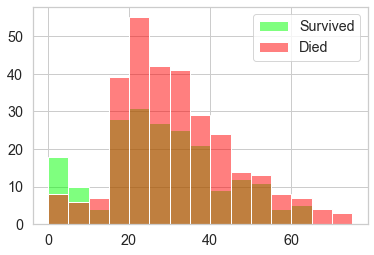

In [142]:
data_survive = traning_feat.loc[traning_feat_survived.loc[traning_feat_survived==1].index]
data_not_sur = traning_feat.loc[traning_feat_survived.loc[traning_feat_survived==0].index]
plt.hist(data_survive['Age'],bins=np.arange(0, 80, 5), fc=(0, 1, 0, 0.5))

plt.hist(data_not_sur['Age'],bins=np.arange(0, 80, 5), fc=(1, 0, 0, 0.5))
plt.legend(loc='upper right', labels=['Survived','Died'])
plt.show()

Из данного графика видно, что самый большой шанс был выжить у детей, если судить по возрасту

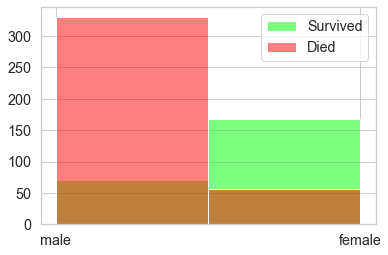

In [143]:
plt.hist(data_survive['Sex'],bins=2, fc=(0, 1, 0, 0.5))
plt.hist(data_not_sur['Sex'],bins=2, fc=(1, 0, 0, 0.5))
plt.legend(loc='upper right', labels=['Survived','Died'])
plt.show()

Из данной гистограммы видно, что больше всего был шанс выжить у женщин, если судить по полу

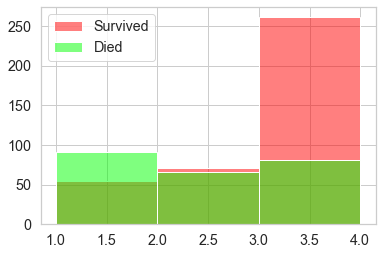

In [144]:
plt.hist(data_not_sur['Pclass'],bins=np.arange(1, 5, 1), fc=(1, 0, 0, 0.5))
plt.hist(data_survive['Pclass'],bins=np.arange(1, 5, 1), fc=(0, 1, 0, 0.5))
plt.legend(loc='upper left', labels=['Survived','Died'])
plt.show()

Тут мы наглядно видим, что шанс выжить у пассажиров первого класса, больше всего. Из представителей третьего класса, в процентном соотношении, мало кто выжил.

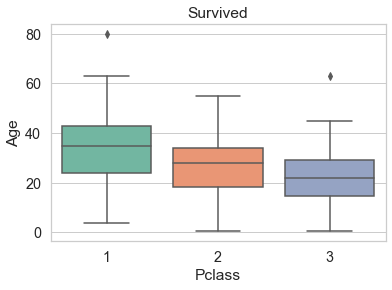

In [90]:
sns.boxplot(x=data_survive['Pclass'], y=data_survive['Age']).set_title('Survived')
plt.show()

На этом графике можно увидеть распределение возраста и класса выжевшего. Видими, что из первого класса выжили в основном не старые люди, в то вермя как из представителей третьего класса выжили в большинстве молодые. 

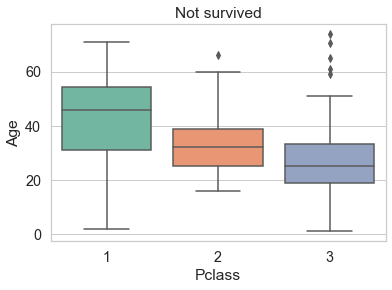

In [59]:
sns.boxplot(x=data_not_sur['Pclass'], y=data_not_sur['Age']).set_title('Not survived')
plt.show()

Из представительей первого класса, не выжили в основном только старые люди,
в то время как предаставители третьего клаасса в основном были не старше 40.

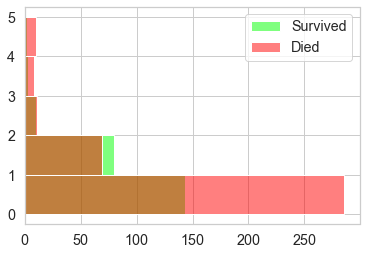

In [146]:
plt.hist(data_survive['SibSp'],bins=np.arange(0, 6, 1), fc=(0, 1, 0, 0.5), orientation='horizontal')
plt.hist(data_not_sur['SibSp'],bins=np.arange(0, 6, 1), fc=(1, 0, 0, 0.5), orientation='horizontal')
plt.legend(loc='upper right', labels=['Survived','Died'])
plt.show()

Тут можно пронаблюдать, что без детей шанс на спасение был меньше половины, в то время как наличие ровно одного ребенка, увеличивает шанс выжить

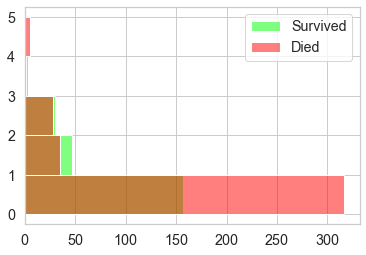

In [147]:
plt.hist(data_survive['Parch'],bins=np.arange(0, 6, 1), fc=(0, 1, 0, 0.5), orientation='horizontal')
plt.hist(data_not_sur['Parch'],bins=np.arange(0, 6, 1), fc=(1, 0, 0, 0.5), orientation='horizontal')
plt.legend(loc='upper right', labels=['Survived','Died'])
plt.show()

Зависимость от родителей похожая, при наличии хотя бы одного, шанс выжить возрастает.

Text(0.5, 1.0, 'Survived')

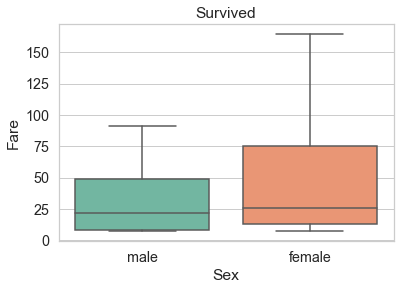

In [148]:
sns.boxplot(x=data_survive['Sex'], y=data_survive['Fare'], showfliers=False).set_title('Survived')

График показывает, что из мущин выжили в основном те, чей билет стоил хотя бы 25 долларов. У женщин более широкий диапозон

Text(0.5, 1.0, 'Not survived')

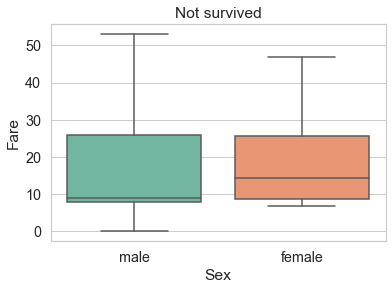

In [149]:
sns.boxplot(x=data_not_sur['Sex'], y=data_not_sur['Fare'], showfliers=False).set_title('Not survived')

Данные график потдверждает рассуждения выше, потому что среди тех кто не выжил, в основном те, чей билет стоил на больше 10 долларов.

#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков).

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

...

**Дерево 2:**

...

Реализуйте полученные деревья по шаблону

In [151]:
def tree(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    predicted = pd.Series(data=0,index=features.index)
    predicted[features.loc[((features['Sex']=='female') & (features['Pclass']<=2)) | (features['Pclass']==1)].index] = 1
    predicted[features.loc[((features['Sex']=='male') | (features['Pclass']>1)) & (( ((features['Age']<=10) & (features['Parch']>=1)) | (features['Pclass']<=2)) | (features['SibSp']==1))].index] = 1
    return predicted

В данном случае одновременно рассамтриваются два решающих дерева. Первое основывается на поле и классе человека, второе только на классе. 

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

...

Реализуйте данный критерий по шаблону

In [152]:
def criteria(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted, 
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    return (target == predicted).mean()

Посчитайте качество полученных ранее деревьев

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [156]:
criteria(testing_feat_survived,tree(testing_feat)) * 100

61.42322097378277

#### 5. Выводы

По итогам, моя картина выжившего человека, выглядит так: Это либо женщина хотя бы со второго класса обслуживания либо пассажир первого класса. Если же пассажир это мальчик и у него есть родитель, то скорее всего он выживет. Или если у пассажира есть ребенок, то он скорее всего выживет.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

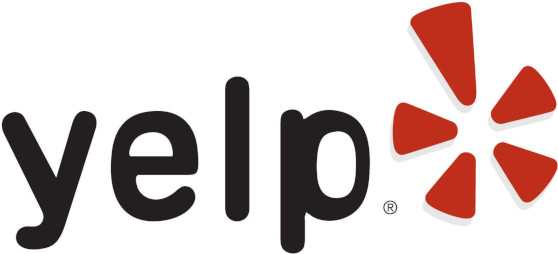

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [159]:
df = pd.read_csv('yelp_business.csv')
df.head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [160]:
df.groupby(['city'])['business_id'].count().sort_values(ascending=False).head()

city
Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
Name: business_id, dtype: int64

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [ ]:
name = df.groupby(['city'])['business_id'].count().sort_values(ascending=False).head(1)
la = df.loc[df['city']==name.reset_index()['city'][0]]
sns.jointplot(x=la["longitude"], y=la["latitude"])

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города `N` и сравните ее с построенным графиком.

*Замечание. Подгружать карту города в качестве фона графика мы научимся чуть позже.*

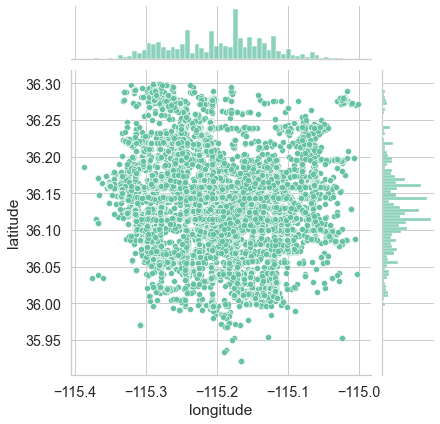

In [86]:
la_out = la.loc[(la['longitude'] < -115.0) & (la['longitude'] > -115.4) & (la['latitude'] > 35.9) & (la['latitude'] < 36.3)]
sns.jointplot(x=la_out["longitude"], y=la_out["latitude"])

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [157]:
rev = pd.read_csv('yelp_review.csv')
rev.head(5)

,Unnamed: 0,business_id,stars
0,0,AEx2SYEUJmTxVVB18LlCwA,5
1,1,VR6GpWIda3SfvPC-lg9H3w,5
2,2,CKC0-MOWMqoeWf6s-szl8g,5
3,3,ACFtxLv8pGrrxMm6EgjreA,4
4,4,s2I_Ni76bjJNK9yG60iD-Q,4


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [158]:
merged = rev.merge(df,left_on='business_id',right_on='business_id')
name = merged.groupby(['city'])['business_id'].count().sort_values(ascending=False).head(1)
lv = merged.loc[merged['city']==name.reset_index()['city'][0]]
rev_idx = rev.set_index('business_id')
rev_int = rev_idx.index.intersection(lv['business_id'])
rev_tmp = rev_idx.loc[rev_int].reset_index()[['business_id','stars']]

KeyError: 'business_id'

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [13]:
rev_ans = rev_tmp.groupby(['business_id'])['stars'].aggregate([np.mean, np.size])
rev_ans

,mean,size
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19
...,...,...
zzOo9n22fBbKAhbSpMzggA,3.230769,26
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4
zzjqFOujmM9surbMANZ_ag,5.000000,3


Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [14]:
rev_ans.rename(columns={'business_id':'Код бизнеса','mean':'Средняя оценка','size':'Количество голосов'})

,Средняя оценка,Количество голосов
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19
...,...,...
zzOo9n22fBbKAhbSpMzggA,3.230769,26
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4
zzjqFOujmM9surbMANZ_ag,5.000000,3


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [15]:
lv_idx = lv.set_index('business_id')
lv_res = lv_idx.join(rev_ans)
lv_res_ren = lv_res.rename(columns={'stars':'tmp','mean':'stars','size':'count'})
lv_ans = lv_res_ren[['latitude', 'longitude', 'categories', 'name', 'stars','count']].reset_index()
lv_ans_without_dup = lv_ans.drop_duplicates()
lv_ans_without_dup

,business_id,latitude,longitude,categories,name,stars,count
0,--9e1ONYQuAa-CB_Rrw7Tw,36.123183,-115.169190,Cajun/Creole;Steakhouses;Restaurants,"""Delmonico Steakhouse""",4.088904,1451
1451,--DdmeR16TRb3LsjG0ejrQ,36.114277,-115.170975,Arts & Entertainment;Festivals,"""World Food Championships""",3.200000,5
1456,--WsruI0IGEoeRmkErU5Gg,36.130899,-115.190785,Carpet Cleaning;Local Services,"""Dial Carpet Cleaning""",4.928571,14
1470,--Y7NhBKzLTbNliMUX_wfg,36.061235,-115.289685,Drywall Installation & Repair;Handyman;Home Se...,"""Pinnacle Restoration""",4.875000,8
1478,--e8PjCNhEz32pprnPhCwQ,36.158851,-115.133272,Pets;Pet Groomers;Pet Services;Pet Stores,"""Lucky's Pet Grooming & Boutique""",3.473684,19
...,...,...,...,...,...,...,...
1604151,zzOo9n22fBbKAhbSpMzggA,36.099328,-115.128494,Dance Clubs;Gay Bars;Nightlife;Bars,"""Goodtimes Bar & Nightclub""",3.230769,26
1604177,zzXuJF6UUT1kgTyCsmgDmQ,36.055602,-115.118218,Spray Tanning;Beauty & Spas;Tanning,"""Sin City Spray Tans""",5.000000,4
1604181,zzjqFOujmM9surbMANZ_ag,36.129838,-115.146037,Nightlife;Lounges;Bars,"""American Express Open Business Lounge""",5.000000,3
1604184,zzsKbL1KMNJqazSqBXskxQ,36.082779,-115.152693,Hotels & Travel;Airports;Airport Terminals,"""McCarran International Airport Terminal 1 - B""",3.666667,6


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

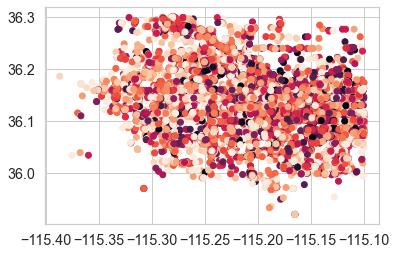

In [67]:
lv_out_na = lv_ans_without_dup.loc[(lv_ans_without_dup['longitude'] < -115.0) & (lv_ans_without_dup['longitude'] > -115.4) & (lv_ans_without_dup['latitude'] > 35.9) & (lv_ans_without_dup['latitude'] < 36.3)]
#lv_out_small = lv_out.head(1000)
plt.scatter(x=lv_out["longitude"], y=lv_out["latitude"], c=lv_out['stars'])
#g = sns.jointplot(x=lv_out["longitude"], y=lv_out["latitude"], kind='scatter',dropna=True)
#g.ax_joint.scatter(x=lv_out["longitude"],y=lv_out["latitude"], c=lv_out['stars'], alpha=0.3)


Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

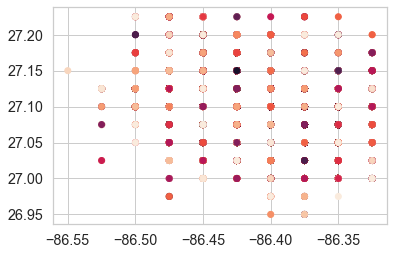

In [75]:
#g1 = sns.jointplot(x=np.round(lv_out["longitude"]*5, decimals=1)*0.25, y=np.round(lv_out["latitude"]*5, decimals=1)*0.25, kind='scatter', hue=lv_out['stars'])
#g1 = sns.jointplot(x=lv_out["longitude"], y=lv_out["latitude"], kind='reg', scatter = False )
#g1.ax_joint.scatter(np.round(lv_out["longitude"]*4, decimals=1)*0.25, np.round(lv_out["latitude"]*4, decimals=1)*0.25, c=lv_out['stars'], alpha=0.3)
#g1
plt.scatter(x=np.round(lv_out["longitude"]*3, decimals=1)*0.25, y=np.round(lv_out["latitude"]*3, decimals=1)*0.25, c=lv_out['stars'])

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

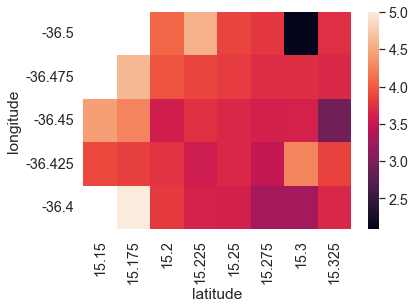

In [99]:
#lv_out.head()
#lv_out.groupby(['longitude','latitude'])
#lv_out.groupby([np.round(lv_out["longitude"]*3, decimals=1)*0.25,np.round(lv_out["latitude"]*3, decimals=1)*0.25])['stars'].mean()
lv_out['longitude'] = np.round(lv_out["longitude"]*3, decimals=1)*0.25
lv_out['latitude'] = np.round(lv_out["latitude"]*3, decimals=1)*0.25
piv_tab = pd.pivot_table(lv_out,index='longitude',values='stars',columns=['latitude'],aggfunc=np.mean)
sns.heatmap(piv_tab)

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** <...>

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [130]:
lv_out
lv_dst = lv_out.groupby(['longitude','latitude'])['name'].count()
lv_dist = lv_dst.reset_index()
#lv_out['amount']
for item in lv_out['longitude']:
    for it in lv_dist['longitude']:
lv_dist.loc[(lv_out['longitude']==lv_dist['longitude']) & (lv_out['latitude']==lv_dist['latitude'])]['name']
#lv_out
#lv_dist_comp = lv_dist.loc[lv_dist>=30]
#lv_dist_comp
#lv_s = lv_dist.loc[lv_dist['longitude','latitude'] == lv_dist_comp['longitude','latitude']]
#lv_s
#lv_dist.loc[lv_dist]
#dist_tab = pd.pivot_table(lv_dist,index='longitude',values='stars',columns=['latitude'],aggfunc=np.mean)
#sns.heatmap(dist_tab)

ValueError: Can only compare identically-labeled Series objects

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** <...>

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [ ]:
...

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <...>

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
...

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
...

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <...>

---
### Задача 3.

В данной задаче вам предстоит распарсить сайт, который вы выберите.

**1.** Каждая ссылка (URL) в интернете состоит из нескольких компонент:

* схема, *например, `http` или `https`*,
* хост, *наример, `en.wikipedia.org`*
* путь, по которому находится информация,
* параметры,
* якорь &mdash; указание фрагмента страницы.

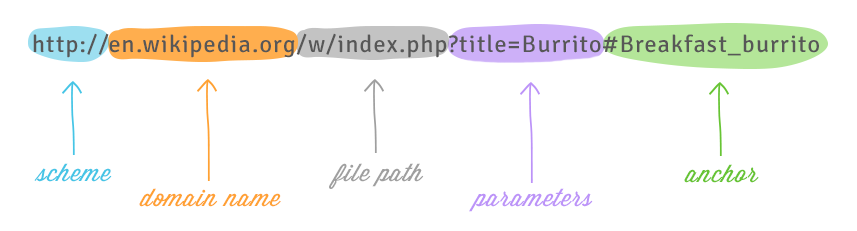

Одна и та же ссылка может иметь несколько форм и вести на ту же самую страницу. Во время обхода сайта это надо учитывать и сохранять один уникальный урл для каждой страницы. Процедура, приводящая урл к каноничному виду, называется нормализацией.
Процедуры, которые применяются к урлу для нормализации, описаны, например, на <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_URL">Википедии</a>.

Установите пакет `url_normalize`, в котором есть готовая функция для нормализации.

Прочитайте, как именно функция `url_normalize` меняет ссылку, и приведите примеры $4$ урлов, которые нормализуются к одному и тому же. Примеры должны демонстрировать различные этапы процедуры нормализации. Одним из этих примеров может быть сам нормализованный урл.

In [ ]:
from url_normalize import url_normalize

In [ ]:
...

_____________
Изучите код, в котором скачиваются страницы сайта `simple.wikipedia.org` с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятия про парсинг данных</a> и **скопируйте его в решение данной задачи**. Код, реализующий обход в ширину с фильтрацией и нормализацией урлов, приведён в виде функции.

In [ ]:
from urllib.parse import urlparse, urldefrag, urljoin
from urllib.request import urlopen
from bs4 import BeautifulSoup
from queue import Queue
import time

Код обхода в ширину:

In [ ]:
def load_web_pages(seed, max_downloads, filtration_function):
    '''Обходит web-страницы в ширину и загружает информацию о них.
    
    Принимает:
        seed (str) -- страница, с которой начинать обход.
        max_downloads (int) -- максимальное число загруженных страниц.
        filtration_function (str -> bool) -- функция, указывающая, 
            стоит ли загружать страницу. Пример: is_wiki_article.
            
    Возвращает:
        pages_json (list) - список словарей с информацией о страницах.
    '''
    
    # Создаём список со страницами
    pages_json = []
    
    # Создаём очередь для обхода в ширину
    q = Queue()
    q.put(seed)

    already_visited = set()
    n_downloads = 0
    time_start = time.time()

    while not q.empty():
        # Нормализуем урл
        main_url = url_normalize(q.get())
        if main_url in already_visited:
            continue
        already_visited.add(main_url)
        html = download_from_the_internet(main_url)

        # Извлекаем ссылки из страницы
        children_links = extract_links_from_html(main_url, html)
        time.sleep(1)

        # Извлекаем текст страницы
        text_info = extract_text_info_from_html(html) 

        # Добавляем запись в таблицу
        text_info['url'] = main_url
        pages_json.append(text_info)

        n_downloads += 1
        if n_downloads > max_downloads:
            break

        # Добавляем ещё не посещённые ссылки в очередь
        for child in children_links:
            if url_normalize(child) not in already_visited \
            and filtration_function(child):
                q.put(child)
                
    return pages_json

**2.** Выберите достаточно крупный сайт, который вам интересен, а также некоторую категорию страниц в нём. Поймите, с какой страницы сайта надо начать обход, чтобы обходить сайты данной категории.

*Пример: ищем статьи про Data Science на Википедии, начинаем со статьи Data Dcience*.

**Укажите, что выбрали:** <...>

Придумайте критерий, который по тексту из HTML-страницы будет определять, находится ли страница в определённой вами категории.

*Пример: статья на Википедии про Data Science, если в ней есть слово "data" или термины из статистики, теории вероятностей и анализа данных*.

**Опишите критерий:** <...>

Начав с выбранной страницы, скачайте не менее $500$ страниц сайта. В качестве функции фильтрации возьмите функцию, которая отделяет страницы с выбранного сайта от других.

In [ ]:
...

Cделайте `pandas`-таблицу со следующей информацией:

* количество слов в тексте статьи;
* принадлежит ли страница выбранной категории.

Для последнего пункта можете воспользоваться функцией поиска слов по заданным префиксам, рассмотренной на <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/data_parsing.html">занятии</a>.

In [ ]:
...

Определите, какой процент скачанных страниц принадлежит выбранной категории?

In [ ]:
...

C помощью гистограмм сравните визуально распределения количества слов в статьях из выбранной категории и во всех остальных. Для этих двух распределений вычислите средние, медианы и дисперсии. Средние и медианы отобразите на графиках с гистограммами. Сделайте выводы.

In [ ]:
...

Постройте boxplot-графики для того, чтобы сравнить эти 2 распределения. Какой способ сравнения кажется вам более удобным?

In [ ]:
...

**3.** Визуализируйте скачанные страницы сайта. В качестве значений по осям возьмите количество слов на странице и количество ссылок на ней. Цветом обозначьте принадлежность выбранной вами категории. 

In [ ]:
...

**4.** Предложите функцию фильтрации web-страниц, которую нужно подать в `load_web_pages`, чтобы среди скачанных сайтов был больше процент страниц из выбранной вами категории.

In [ ]:
...

Скачайте снова не менее $500$ страниц, но уже с новой функцией фильтрации. Добавьте следующую информацию к каждой странице:

* глубина в обходе,
* время скачивания страницы.

Для замера времени можете воспользоваться функцией `time` из пакета `time`.

In [ ]:
...

Постройте гистограмму для времени скачивания страницы.

In [ ]:
...

Предположите, каким известным вам стандартным распределением оно может быть приближено? 

In [ ]:
...

**Выводы:** <...>